In [1]:
import geopandas as gpd
from shapely import ops
from shapely import geometry as geom
from geopandas.tools import sjoin
%matplotlib inline

In [2]:
### GET BOROUGH GEOJSON FILE FROM:
### https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson
bb = gpd.read_file('block-groups-polygons-simple.geojson')

In [3]:
bb

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,GEOID_1,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,OBJECTID,OBJECTID_1,SHAPE_Area,SHAPE_Leng,STATEFP,TRACTCE,geo_id,geometry
0,113131.0,0.0,1,081,S,360810140001,15000US360810140001,+40.7030341,-073.8279064,G5030,Block Group 1,2038,10466,0.000012,0.020864,36,014000,15000US360810140001,"POLYGON ((-73.82266 40.703585, -73.83152 40.70..."
1,22906.0,0.0,1,081,S,360810141001,15000US360810141001,+40.7681196,-073.9103709,G5030,Block Group 1,2039,10468,0.000002,0.006593,36,014100,15000US360810141001,"POLYGON ((-73.91088999999999 40.76758, -73.911..."
2,115513.0,0.0,2,081,S,360810142012,15000US360810142012,+40.7000618,-073.8243325,G5030,Block Group 2,2040,10471,0.000012,0.015220,36,014201,15000US360810142012,"POLYGON ((-73.82125000000001 40.699699, -73.82..."
3,92948.0,0.0,1,081,S,360810142011,15000US360810142011,+40.7021186,-073.8249086,G5030,Block Group 1,2041,10470,0.000010,0.014664,36,014201,15000US360810142011,"POLYGON ((-73.8233 40.703353, -73.822460000000..."
4,200156.0,0.0,1,081,S,360810142021,15000US360810142021,+40.7009838,-073.8181909,G5030,Block Group 1,2042,10472,0.000021,0.022728,36,014202,15000US360810142021,"POLYGON ((-73.82246000000001 40.703656, -73.81..."
5,415976.0,0.0,2,081,S,360810142022,15000US360810142022,+40.6975867,-073.8212913,G5030,Block Group 2,2043,10473,0.000044,0.037606,36,014202,15000US360810142022,"POLYGON ((-73.81619000000001 40.696623, -73.82..."
6,51236.0,0.0,1,081,S,360810143001,15000US360810143001,+40.7655910,-073.9102973,G5030,Block Group 1,2044,10474,0.000005,0.009909,36,014300,15000US360810143001,"POLYGON ((-73.91009 40.767204, -73.90849 40.76..."
7,85331.0,0.0,2,081,S,360810143002,15000US360810143002,+40.7667267,-073.9122400,G5030,Block Group 2,2045,10475,0.000009,0.013850,36,014300,15000US360810143002,"POLYGON ((-73.91168 40.767963, -73.91009 40.76..."
8,222446.0,0.0,1,081,S,360810144001,15000US360810144001,+40.6985690,-073.8285071,G5030,Block Group 1,2046,10476,0.000024,0.023312,36,014400,15000US360810144001,"POLYGON ((-73.82889 40.69586, -73.831 40.69999..."
9,76755.0,0.0,1,081,S,360810145001,15000US360810145001,+40.7639106,-073.9067113,G5030,Block Group 1,2047,10477,0.000008,0.011666,36,014500,15000US360810145001,"POLYGON ((-73.90451 40.764589, -73.90651 40.76..."


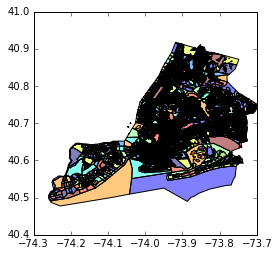

In [4]:
bb.plot()

In [5]:
sum(bb.area)

0.13039516685499863

In [6]:
bb.geometry.convex_hull

0       POLYGON ((-73.83152 40.70139, -73.832130000000...
1       POLYGON ((-73.91009 40.767204, -73.91088999999...
2       POLYGON ((-73.82631000000001 40.698258, -73.82...
3       POLYGON ((-73.82723 40.700706, -73.82795299999...
4       POLYGON ((-73.814358 40.698336, -73.81775 40.6...
5       POLYGON ((-73.825902 40.694589, -73.82753 40.6...
6       POLYGON ((-73.9105 40.763979, -73.9121 40.7647...
7       POLYGON ((-73.9121 40.76473, -73.9145 40.76585...
8       POLYGON ((-73.82801000000001 40.694067, -73.83...
9       POLYGON ((-73.90651 40.762109, -73.908908 40.7...
10      POLYGON ((-73.908908 40.763229, -73.9105 40.76...
11      POLYGON ((-73.9126 40.762766, -73.91499 40.763...
12      POLYGON ((-73.91019 40.761638, -73.9126 40.762...
13      POLYGON ((-73.90779000000001 40.760518, -73.91...
14      POLYGON ((-73.82718 40.692378, -73.82801000000...
15      POLYGON ((-73.9139 40.759818, -73.91468 40.760...
16      POLYGON ((-73.91468 40.760187, -73.91709 40.76...
17      POLYGO

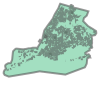

In [7]:
ops.unary_union(bb.geometry.convex_hull)

In [8]:
bb.set_geometry(bb.geometry.buffer(0.01))

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,GEOID_1,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,OBJECTID,OBJECTID_1,SHAPE_Area,SHAPE_Leng,STATEFP,TRACTCE,geo_id,geometry
0,113131.0,0.0,1,081,S,360810140001,15000US360810140001,+40.7030341,-073.8279064,G5030,Block Group 1,2038,10466,0.000012,0.020864,36,014000,15000US360810140001,POLYGON ((-73.81931455159267 40.69416120167056...
1,22906.0,0.0,1,081,S,360810141001,15000US360810141001,+40.7681196,-073.9103709,G5030,Block Group 1,2039,10468,0.000002,0.006593,36,014100,15000US360810141001,POLYGON ((-73.91514361139825 40.75852976298252...
2,115513.0,0.0,2,081,S,360810142012,15000US360810142012,+40.7000618,-073.8243325,G5030,Block Group 2,2040,10471,0.000012,0.015220,36,014201,15000US360810142012,POLYGON ((-73.81264335176679 40.70479071937461...
3,92948.0,0.0,1,081,S,360810142011,15000US360810142011,+40.7021186,-073.8249086,G5030,Block Group 1,2041,10470,0.000010,0.014664,36,014201,15000US360810142011,POLYGON ((-73.82612056628844 40.71296626719955...
4,200156.0,0.0,1,081,S,360810142021,15000US360810142021,+40.7009838,-073.8181909,G5030,Block Group 1,2042,10472,0.000021,0.022728,36,014202,15000US360810142021,POLYGON ((-73.83210952819356 40.70103176570368...
5,415976.0,0.0,2,081,S,360810142022,15000US360810142022,+40.6975867,-073.8212913,G5030,Block Group 2,2043,10473,0.000044,0.037606,36,014202,15000US360810142022,POLYGON ((-73.83078535432074 40.70736107624759...
6,51236.0,0.0,1,081,S,360810143001,15000US360810143001,+40.7655910,-073.9102973,G5030,Block Group 1,2044,10474,0.000005,0.009909,36,014300,15000US360810143001,"POLYGON ((-73.9178513319179 40.77350969003839,..."
7,85331.0,0.0,2,081,S,360810143002,15000US360810143002,+40.7667267,-073.9122400,G5030,Block Group 2,2045,10475,0.000009,0.013850,36,014300,15000US360810143002,POLYGON ((-73.90164359132936 40.77253470189937...
8,222446.0,0.0,1,081,S,360810144001,15000US360810144001,+40.6985690,-073.8285071,G5030,Block Group 1,2046,10476,0.000024,0.023312,36,014400,15000US360810144001,POLYGON ((-73.83783167489661 40.69138195303856...
9,76755.0,0.0,1,081,S,360810145001,15000US360810145001,+40.7639106,-073.9067113,G5030,Block Group 1,2047,10477,0.000008,0.011666,36,014500,15000US360810145001,POLYGON ((-73.90027639491706 40.77364861301611...


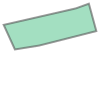

In [9]:
bb.geometry[3]

In [10]:
gpd.GeoSeries(avg).plot()

NameError: name 'avg' is not defined

In [ ]:
avg = avg.convex_hull
gpd.GeoSeries(avg).plot()

In [ ]:
avg

In [ ]:
avg.area

In [ ]:
print avg.centroid

In [ ]:
points = [geom.Point(-73.94650690661533, 40.68857526610002)]
gs = gpd.GeoSeries(points)
gd = gpd.GeoDataFrame(geometry=gs)

In [ ]:
gd.crs = bb.crs

In [ ]:
sjoin(gd, bb, how="left", op="within")